# Introduction to Artificial Neural Networks and Deep Learning


## Why Deep Learning?

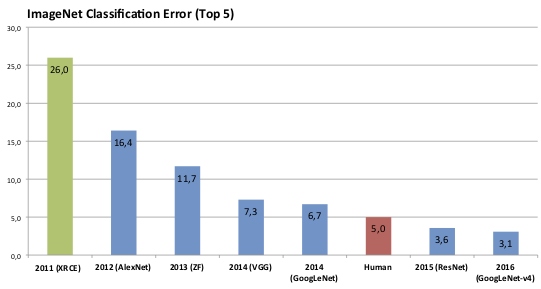

Winner results of the ImageNet large scale visual recognition challenge (LSVRC) of the past years on the top-5 classification task: The green bar indicates the best computer vision approach, whereas the blue bars are all deep neural network architectures. The human score is represented as the red bar. (Credit: https://www.researchgate.net/publication/324476862_Survey_of_neural_networks_in_autonomous_driving)

## 8 Inspirational Applications of Deep Learning

- Link: https://machinelearningmastery.com/inspirational-applications-deep-learning/

and more:
- Google "Quick, Draw!": https://quickdraw.withgoogle.com/
- Autodraw: https://www.autodraw.com/
- Handwriting: https://distill.pub/2016/handwriting/ 

## Paint Videos in the Style of Art’s Great Masters
- Link: https://developer.nvidia.com/blog/deep-learning-helps-transfer-famous-artistic-styles-to-videos/

## It's learning !

This is not about smartly engineered software programs for a specific task.

This is about programs that **automatically learn** how to accomplish a task.

That's a huge paradigm shift:
- rather than translating your **deep knowledge** into a computer program
- a **machine learning** algorithm automatically generates a new "software" from training examples
- the new "software" is a **black-box** that works well, but we do not really know what it learnt
- this process may prevent you to actually improve your knowledge about complex phenomena

---

## When a Computer Program Keeps You in Jail

Sometimes they get it wrong, and we do not know why.

- *Note:* this is about black-boxes in general, the software referred in the article was not using deep learning

- Link: https://www.nytimes.com/2017/06/13/opinion/how-computers-are-harming-criminal-justice.html



## Accessorize to a Crime: 
### Real and Stealthy Attacks on State-of-the-Art Face Recognition

Sometimes they can be fooled.

- Link: https://www.cs.cmu.edu/~sbhagava/papers/face-rec-ccs16.pdf

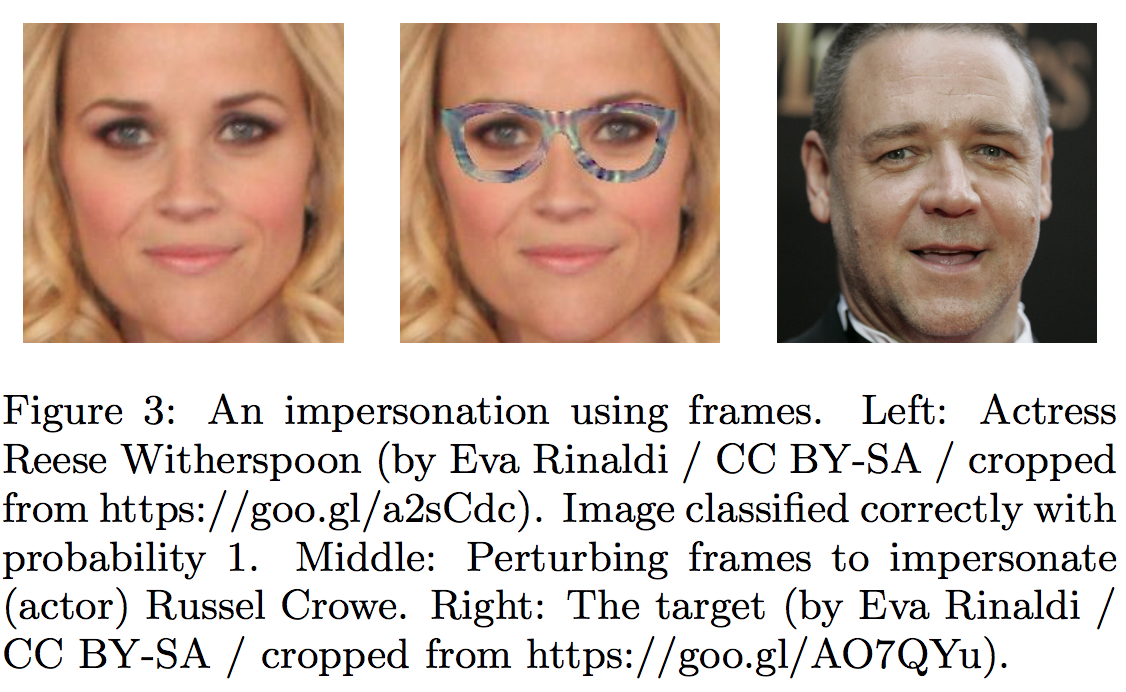



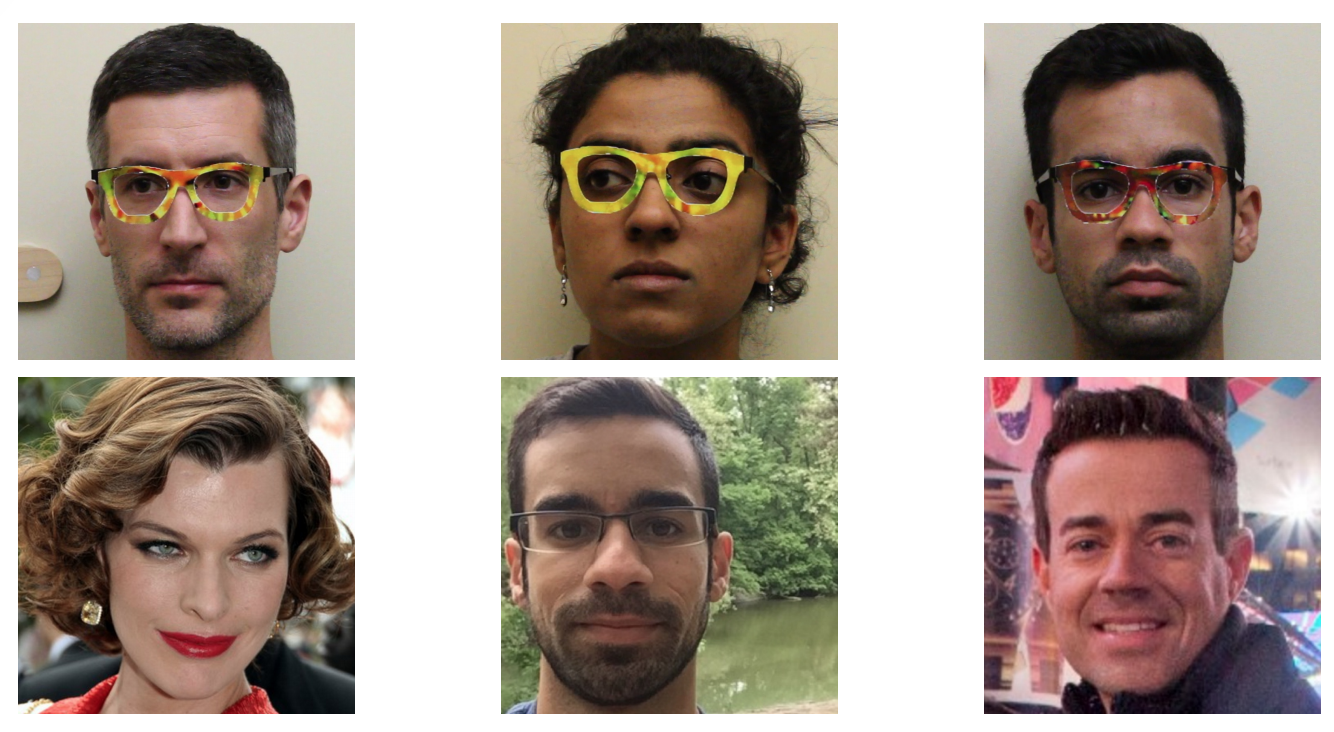

## Neuron

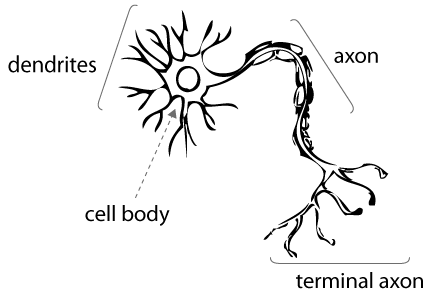

We can simplify a **neuron** as a "thing" with:
- several inputs coming from **dendrites**
- one output transmitted through the **axon**


 - Image Credits: https://medium.com/technology-invention-and-more/everything-you-need-to-know-about-artificial-neural-networks-57fac18245a1

## Artificial Neuron

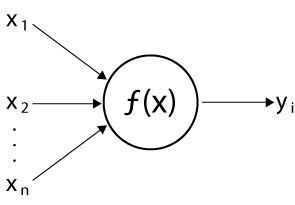

We can mimic a neuron with:
- a **function** (the cell body)
  - which function?
- that receives several inputs
- and produces an output

## Artificial Neural Network

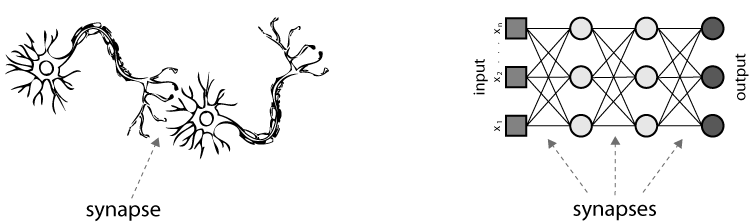

As biological neurons are connected one another through **synapses**, we can similarly connect artificial neurons to form an artificial neural network.

- Each neuron "processes" **several inputs** to produce **one output** which is **forwarded to several other neurons**.

**Question: Are neurons all the same?** 

It would be difficult to achieve anything interesting if neurons behave all the same.

We make neurons "compute" a different output by allowing them to **weigh differently the several inputs they receive**.

*Note: these ideas date back in the '60s.*

## Brain Training

Repeat *ad libitum*...

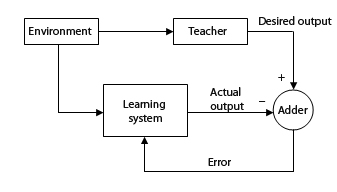

In machine-learning terms:
- a training instance is presented to the **machine learning algorithm**


- the algorithm produces an output or **prediction** for that instance


- the difference between the **prediction** and the desired output or **label** of the instance is called **loss** (or error)


- the loss is used to **update the parameters** (weights) of the machine learning algorithm
  - in Artificial Neural Networks (ANN) this is called *back propagation*, and, as in many machine learning tasks, this is a gradient descent of the loss function

- the error feedback is weighted by the **learning rate**:
  - a small learning rate means small and more cautious steps

- repeat over **several training instances**, i.e., **training dataset**


- **repeat** the whole process several times: **learning iterations** or **training epochs**

## The ingredients of an Artificial Neural Network

1. the **neurons**:
  - which **function** to use?
    - this is called **activation function**
  - which **weights** on their inputs?
    - this is the goal of the training
  
  
2. the **network**:
  - how to link neurons together?


3. the **training** examples:
  - a set of *instances* for which we know the label


4. a **quality measure**:
  - how good is our prediction ?

## The Keras library for Deep Learning

We will use the **Keras** library for building and training Deep Neural Networks.

Keras is a high-level neural networks API, written in Python. It was developed with a focus on enabling fast experimentation. *Being able to go from idea to result with the least possible delay is key to doing good research*.

Use Keras if you need a deep learning library that:

- Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
- Supports both convolutional networks and recurrent networks, as well as combinations of the two.
- Runs seamlessly on CPU and GPU.

https://keras.io/

We will use the following manual:
- Deep Learning with Python. François Chollet. Manning. 2018.

Deep Learning Textbook:
- Machine Learning Yearning. Andrew Ng. http://www.mlyearning.org/

## The high-level Keras view of a Neural Network

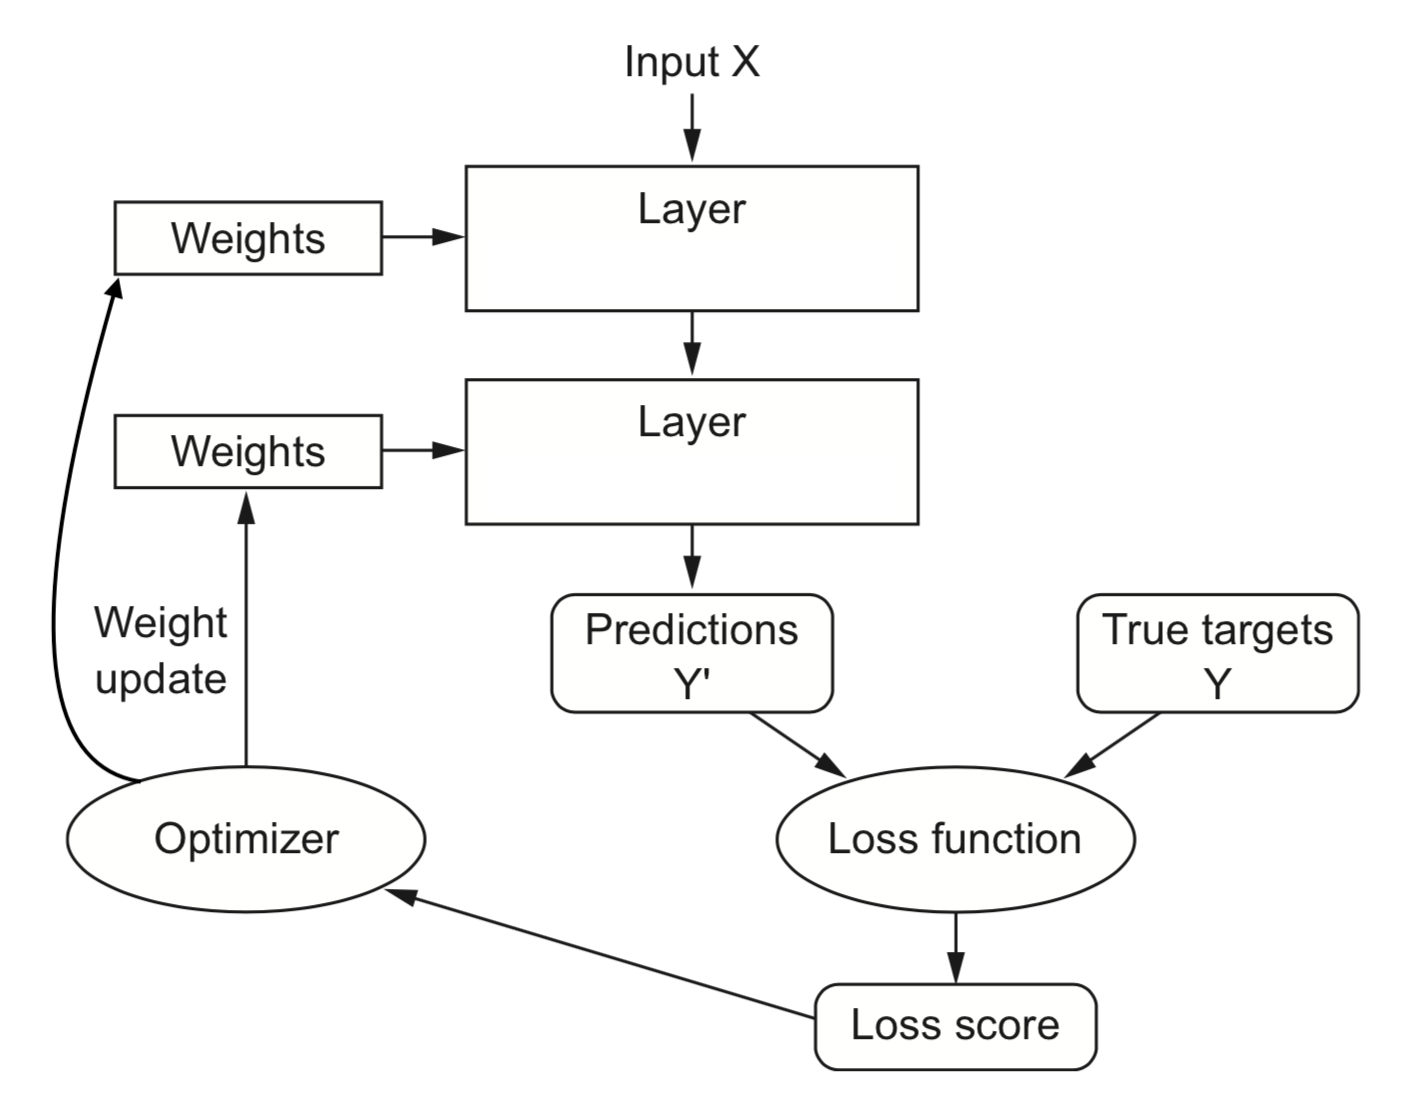

## A simple binary classification task.

[[0.1 0.1]
 [0.1 0.2]
 [0.2 0.1]
 [0.2 0.2]]
[0 1 1 1]


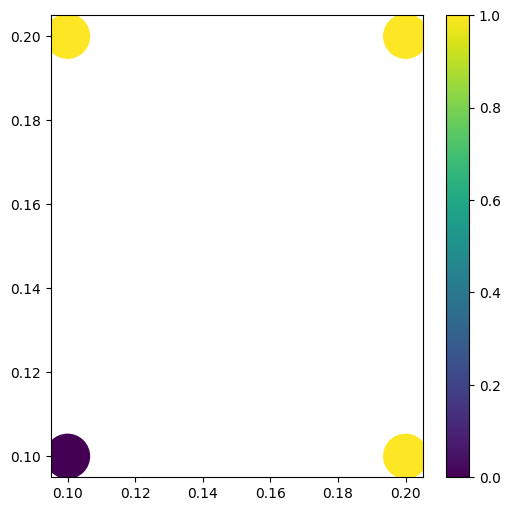

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# The training examples:
# a list of 2-D points
train_X = np.array( [ [.1, .1],
                      [.1, .2],
                      [.2, .1],
                      [.2, .2]
                    ] )

# The desired output
train_y = np.array( [0,1,1,1] )
print (train_X)
print (train_y)

fig, axes = plt.subplots(figsize=(6,6))

sc = axes.scatter( train_X[:,0], # x-coordinate
                   train_X[:,1], # y-coordinate
                   c=train_y,    # color according to labels
                   s=1000,       # size of the point
                   vmin=0, vmax=1)  # fixes extremes of colorbar 
fig.colorbar(sc);

## Our First Neural Network

- One single neuron
- 2-dimensional input, i.e., $x_1, x_2$
- **sigmoid activation function**
  - 0-1 output
  
$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$
  

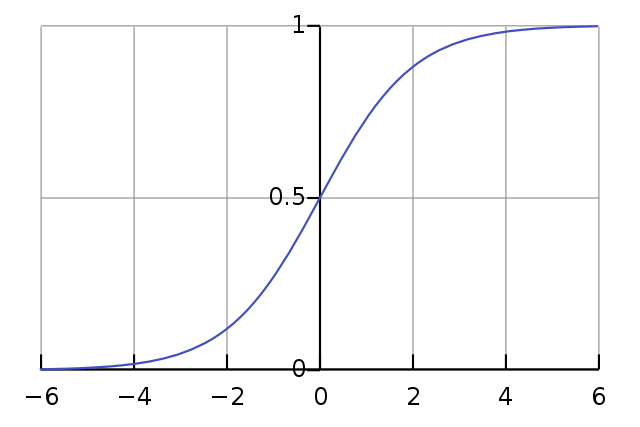

  
- **binary cross-entropy loss**
  - useful for binary classification

$$
H = -\sum_{(x,y) \in {\cal D}} \left( T(y=1|x) \cdot \log( P(y=1|x) ) +  T(y=0|x) \cdot \log( P(y=0|x) )\right)
$$

where $T$ is the true probability distribution and $P$ is the predicted probability distribution.

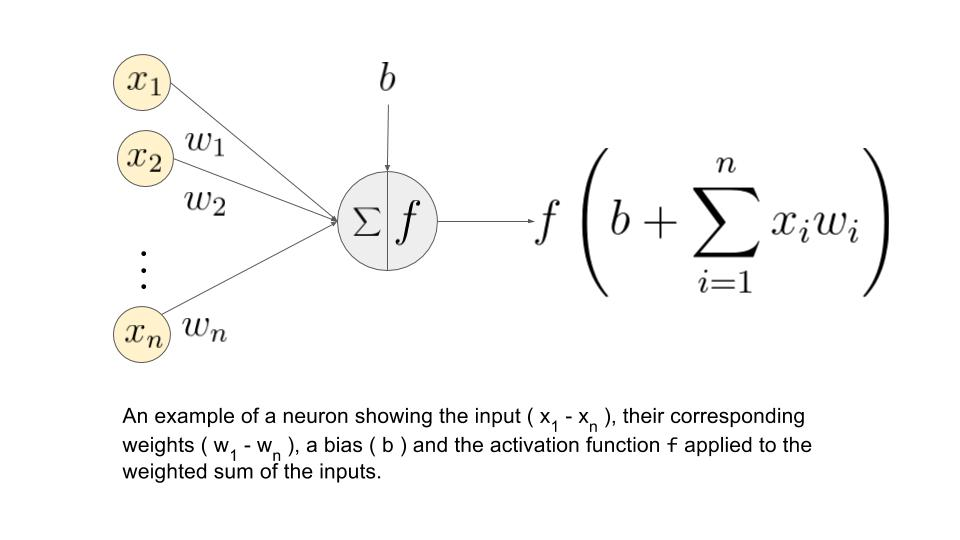

Image Credit: https://www.learnopencv.com/understanding-activation-functions-in-deep-learning/

In [2]:
# if needed, uncomment below
#import sys
#!{sys.executable} -m pip install tensorflow

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# initialize the network
model = models.Sequential()

# add nodes to the network
# we will see this later
model.add( 
    layers.Dense(1,                    # no. of neurons
                 activation='sigmoid', # activation function
                 input_shape=(2,)      # shape of the input
                )
)

# finalize the network
model.compile( optimizer=optimizers.Adam(learning_rate=0.9),
               loss='binary_crossentropy',       # loss function
               metrics=['acc'] )   # additional quality measure

# train the network
model.fit( x=train_X, # training examples
           y=train_y, # desired output
           epochs=50, # number of training epochs # 50
           verbose=1);

2023-11-05 23:25:36.561875: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
1/1 [==============================] - 0s 430ms/step - loss: 0.6479 - acc: 0.7500
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 0.5330 - acc: 0.7500
Epoch 3/50
1/1 [==============================] - 0s 4ms/step - loss: 0.5763 - acc: 0.7500
Epoch 4/50
1/1 [==============================] - 0s 4ms/step - loss: 0.5867 - acc: 0.7500
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 0.5575 - acc: 0.7500
Epoch 6/50
1/1 [==============================] - 0s 4ms/step - loss: 0.5177 - acc: 0.7500
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 0.4938 - acc: 0.7500
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 0.4958 - acc: 0.7500
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 0.5041 - acc: 0.7500
Epoch 10/50
1/1 [==============================] - 0s 4ms/step - loss: 0.4949 - acc: 0.7500
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 0.4714 - acc: 0.

In [4]:
# run evaluation metrics on the data
# this returns the loss and the metrics adopted
print (model.evaluate(train_X, train_y))

1/1 [==============================] - 0s 116ms/step - loss: 0.2030 - acc: 1.0000
[0.20295175909996033, 1.0]


In [5]:
# get model predictions for the training data points
pred_y = model.predict(train_X)
print (pred_y)
print (pred_y.shape)

1/1 [==============================] - 0s 77ms/step
[[0.36649153]
 [0.8406687 ]
 [0.8499364 ]
 [0.98100895]]
(4, 1)


In [6]:
pred_y.flatten()

array([0.36649153, 0.8406687 , 0.8499364 , 0.98100895], dtype=float32)

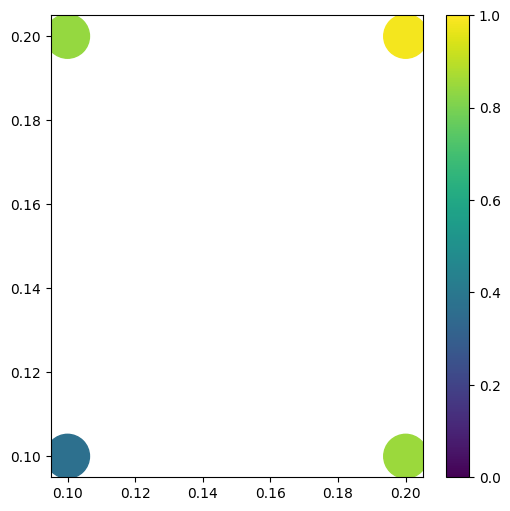

In [7]:
fig, axes = plt.subplots(figsize=(6,6))

sc = axes.scatter( train_X[:,0], # x-coordinate
                   train_X[:,1], # y-coordinate
                   c=pred_y.flatten(), # color according to predictions
                   s=1000,          # size of the dots
                   vmin=0, vmax=1)  # min/max values for the colorbar
fig.colorbar(sc);

## Note

The prediction produced by the network is not extacly 0 or 1.

Thresholding >=0.5 is used to translate that into a 0/1 class prediction.



## Try changing some of the network parameters

- **epochs** is the number of training iterations, i.e., the number of times the data is processed, 
  - the larger the better
- **learning rate** is the confidence given by the optimizer to the single training step
  - larger learning rate means faster training
  - smaller means more conservative, usually more accurate, and slower.

Usually you want to have a small learning rate and a large number of epochs.


## Visualize what the network learnt

1/1 [==============================] - 0s 46ms/step
[4.3126196e-04 9.9979138e-01 9.9979097e-01 1.0000000e+00]


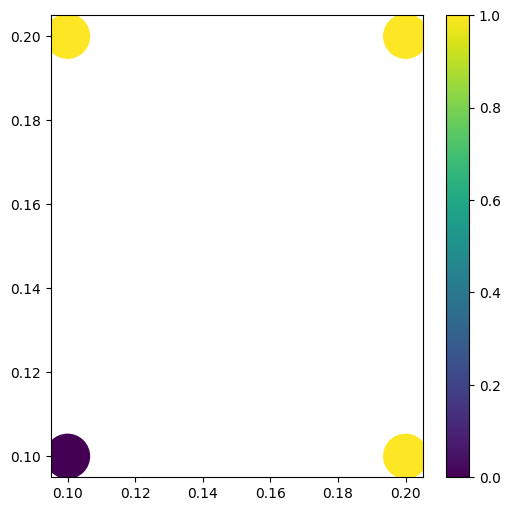

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# The training examples:
# a list of 2-D points
train_X = np.array( [ [.1, .1],
                      [.1, .2],
                      [.2, .1],
                      [.2, .2]
                    ] )

# The desired output
train_y = np.array( [0,1,1,1] )

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# initialize the network
model = models.Sequential()

# add nodes to the network
# we will see this later
model.add( 
    layers.Dense(1,                    # no. of neurons
                 activation='sigmoid', # activation function
                 input_shape=(2,)      # shape of the input
                ))

# finalize the network
model.compile( optimizer=optimizers.Adam(learning_rate=0.1), # lr is the learning rate
               loss='binary_crossentropy',
               metrics=['accuracy'] )

# train the network
model.fit( x=train_X, # training examples
           y=train_y, # desired output
           epochs=10000, # number of training epochs 
           verbose=0) # you can change verbosity to 1

# use the model to label training instances
pred_y = model.predict(train_X).flatten()
print (pred_y)

# plot the results
fig, axes = plt.subplots(figsize=(6,6))

sc = axes.scatter( train_X[:,0], # x-coordinate
                   train_X[:,1], # y-coordinate
                   c=pred_y,    # color according to predictions
                   s=1000,
                   vmin=0, vmax=1)

fig.colorbar(sc);

29/29 [==============================] - 0s 1ms/step


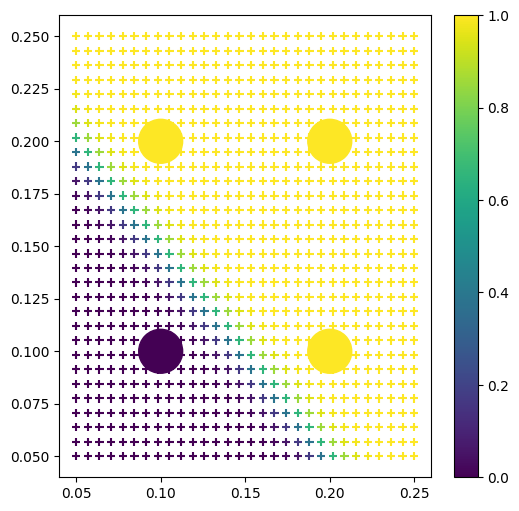

In [9]:
# 30 points between .05 and 0.25
# x and y coordinates of a 30x30 grid
xx_instances = [ [x,y] for x in np.linspace(.05, .25, 30)
                       for y in np.linspace(.05, .25, 30) ]
xx_instances = np.array(xx_instances) # make it numpy array

# use the model to predict on grid points
yy_pred = model.predict(xx_instances)

# plot the results
fig, axes = plt.subplots(figsize=(6,6))

## prediction grid
sc = axes.scatter( xx_instances[:,0], # x-coordinate
                   xx_instances[:,1], # y-coordinate
                   c=yy_pred.flatten(),    # color according to predictions
                   marker='+',vmin=0, vmax=1)

## original dataset
sc = axes.scatter( train_X[:,0], # x-coordinate
                   train_X[:,1], # y-coordinate
                   c=pred_y,    # color according to predictions
                   s=1000,
                   vmin=0, vmax=1)


fig.colorbar(sc);

## Weights learning by Gradient Descent

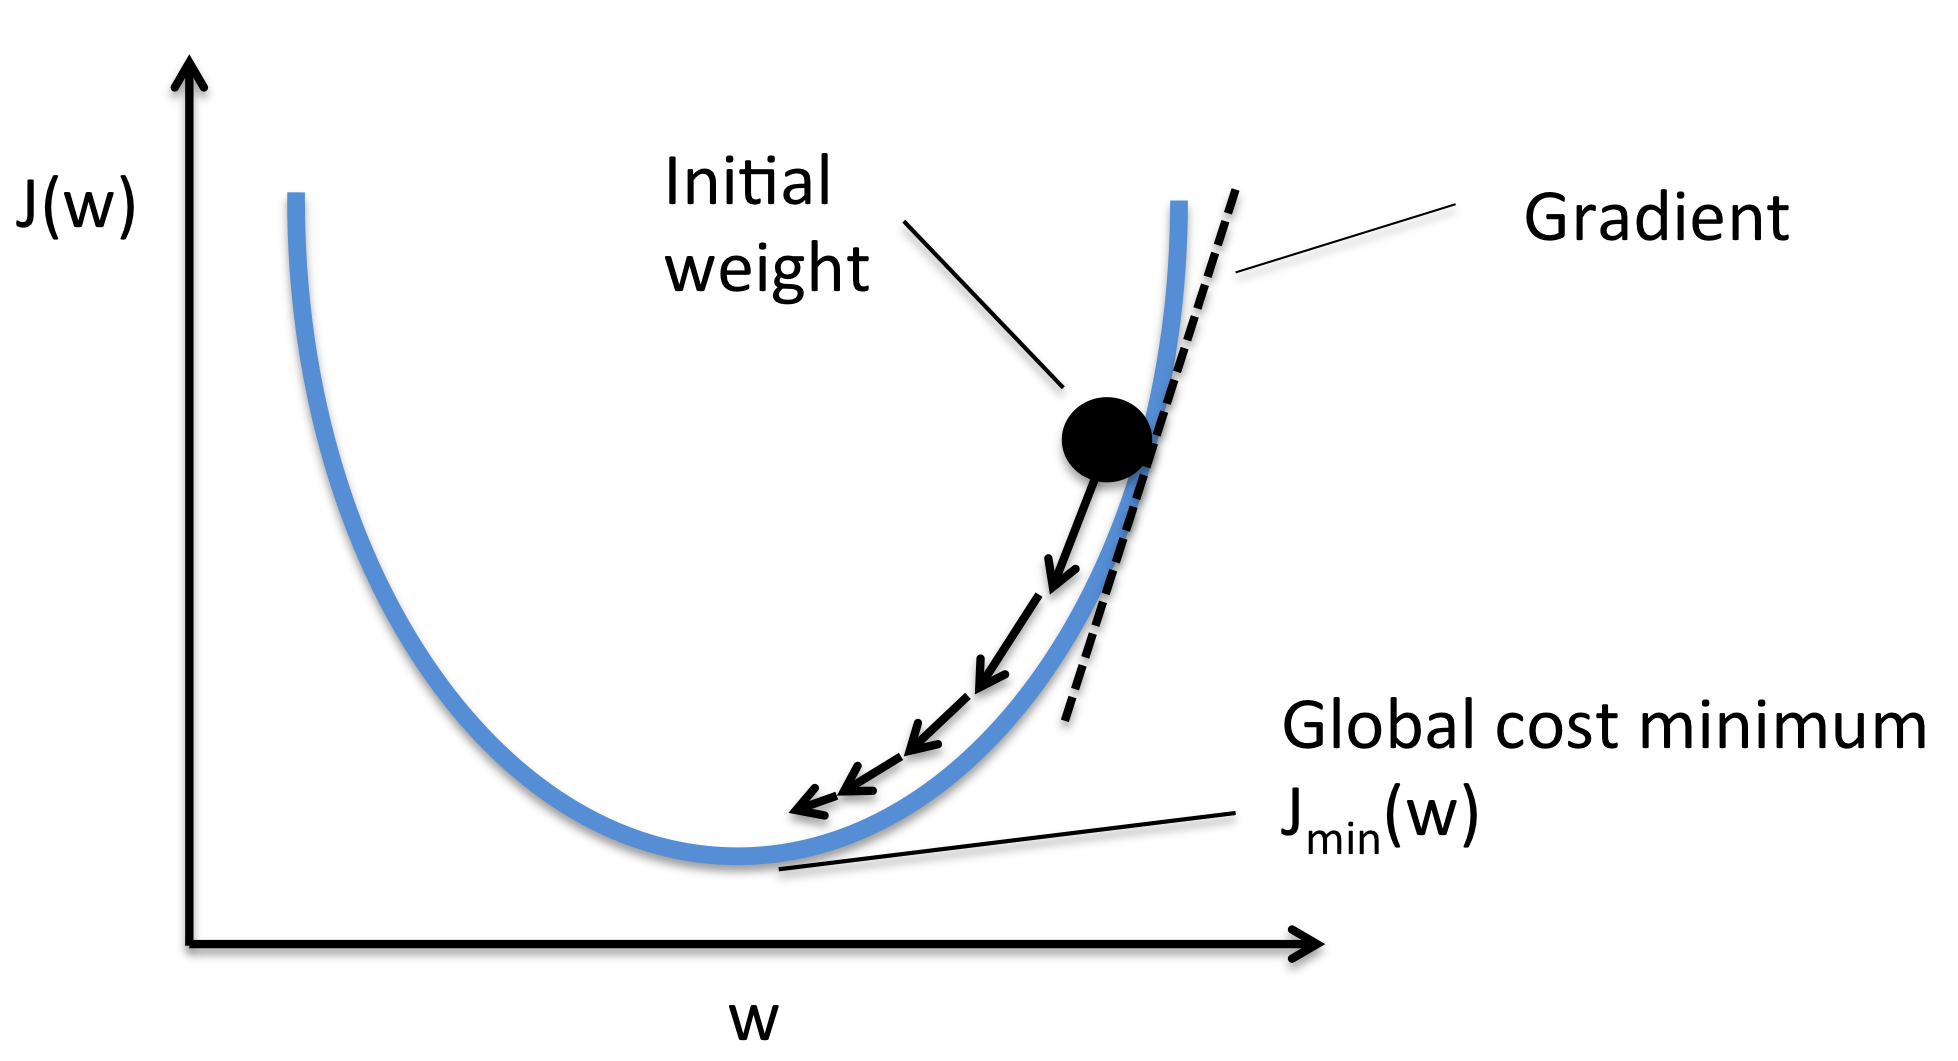

Given the loss function $J$, we want to find the weights $w$ that minimize the errror.

This is done through and iterative process called Gradient Descent according to the following rule

$$
w_i^{t+1} = w_i^{t} -\eta \frac{\partial J}{\partial  w_i^{t}}
$$

where the learning rate $\eta$ "smooths" the gradient descent direction.

The weight update is applied for each weight $w_i$ of the network.

The update is computed after measuring the loss $J$ on a batch of training instances.

An epoch consists in processing all the batches in the dataset.

Multiple epochs are repeated until convergence.

The implementation of this process is known as **back-propagation** for the efficient strategy that can be exploited for the case of artificial neural networks. 

## Universal Approximation Theorem

The artificial neural network below can approximate any continuous function with a sufficiently large set of neurons in the middle (hidden) layer.

This theorem "justifies" the use of artificial neural networks for any learning task of your choice.

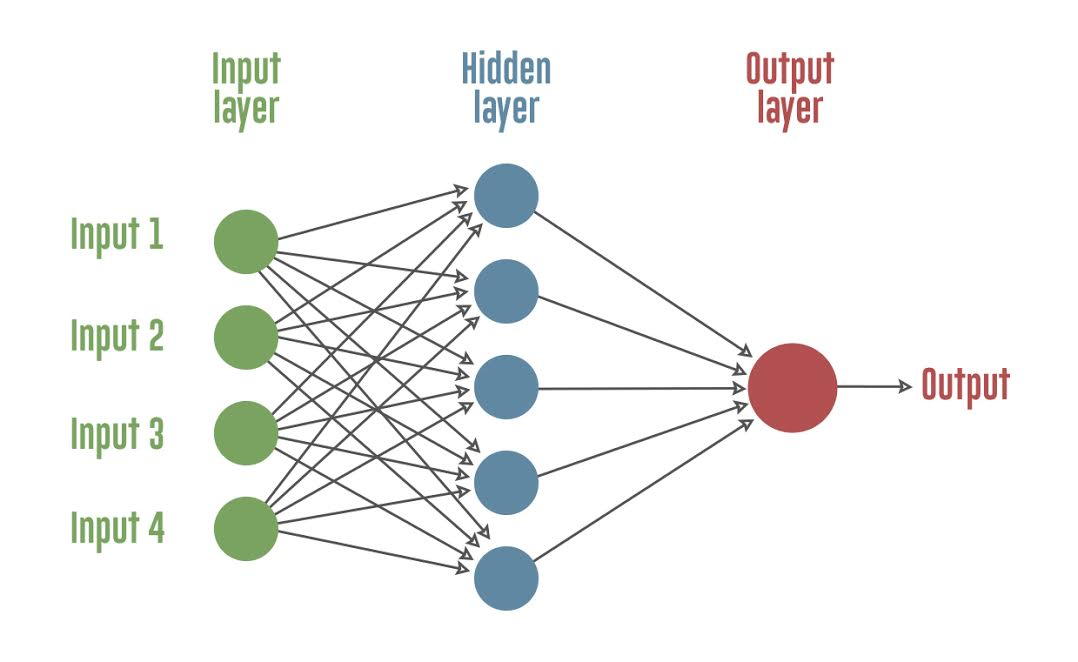

## An interesting demo

Link: https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=1,1&seed=0.73844&showTestData=false&discretize=false&percTrainData=60&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false